<a href="https://colab.research.google.com/github/joshpodl/Capstone-Project/blob/main/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#import data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Bus_Breakdown_and_Delays_20250601.csv')

df.head()


<ipython-input-11-86afa1bda623>:6: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Bus_Breakdown_and_Delays_20250601.csv')


,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1227538,Special Ed AM Run,2621,J711,Heavy Traffic,75003,11/05/2015 08:10:00 AM,11/05/2015 08:12:00 AM,New Jersey,...,NaN,11,Yes,No,Yes,11/05/2015 08:12:00 AM,NaN,11/05/2015 08:12:14 AM,Running Late,School-Age
1,2015-2016,1227539,Special Ed AM Run,1260,M351,Heavy Traffic,06716,11/05/2015 08:10:00 AM,11/05/2015 08:12:00 AM,Manhattan,...,20MNS,2,Yes,Yes,No,11/05/2015 08:12:00 AM,NaN,11/05/2015 08:13:34 AM,Running Late,School-Age
2,2015-2016,1227540,Pre-K/EI,418,3,Heavy Traffic,C445,11/05/2015 08:09:00 AM,11/05/2015 08:13:00 AM,Bronx,...,15MIN,8,Yes,Yes,Yes,11/05/2015 08:13:00 AM,NaN,11/05/2015 08:13:22 AM,Running Late,Pre-K
3,2015-2016,1227541,Special Ed AM Run,4522,M271,Heavy Traffic,02699,11/05/2015 08:12:00 AM,11/05/2015 08:14:00 AM,Manhattan,...,15 MIN,6,No,No,No,11/05/2015 08:14:00 AM,NaN,11/05/2015 08:14:04 AM,Running Late,School-Age
4,2015-2016,1227542,Special Ed AM Run,3124,M373,Heavy Traffic,02116,11/05/2015 08:13:00 AM,11/05/2015 08:14:00 AM,Manhattan,...,NaN,6,No,No,No,11/05/2015 08:14:00 AM,NaN,11/05/2015 08:14:08 AM,Running Late,School-Age


In [63]:
# clean data keeping only necessary columns
# keep only events in Bronx, Manhattan, Queens, Brooklyn
# separate data frame for breakdowns (remove delays)
df_trim = df[['School_Year','Run_Type','Reason','Boro','Has_Contractor_Notified_Schools','Has_Contractor_Notified_Parents','Breakdown_or_Running_Late']]
df_trim = df_trim[df_trim['Boro'].isin(['Bronx','Manhattan','Queens','Brooklyn'])]
df_breakdown = df_trim[df_trim['Breakdown_or_Running_Late'] == 'Breakdown']
df_breakdown.head()


,School_Year,Run_Type,Reason,Boro,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Breakdown_or_Running_Late
22,2015-2016,General Ed AM Run,Other,Bronx,Yes,Yes,Breakdown
30,2015-2016,Special Ed AM Run,Won`t Start,Queens,Yes,Yes,Breakdown
40,2017-2018,Special Ed AM Run,Flat Tire,Bronx,Yes,Yes,Breakdown
46,2015-2016,Special Ed PM Run,Won`t Start,Queens,No,No,Breakdown
50,2015-2016,Special Ed AM Run,Mechanical Problem,Brooklyn,Yes,Yes,Breakdown


In [85]:
# count of breakdowns by borough
# count of breakdowns by school year
# count of breakdowns by borough and school year
# count of breakdowns by borough and reason
# count of breakdowns by borough and run type
# count of breakdowns by if school was notified
# count of breakdowns by if parents were notified
print(df_breakdown.groupby(['Boro'])['Boro'].count().sort_values(ascending = False))
print('______________________________________________________')
print(df_breakdown.groupby(['School_Year'])['School_Year'].count().sort_values(ascending = False))
print('______________________________________________________')
print(df_breakdown.groupby(['Boro','School_Year'])['School_Year'].count())
print('______________________________________________________')
print(df_breakdown.groupby(['Boro','Reason'])['Reason'].count())
print('______________________________________________________')
print(df_breakdown.groupby(['Boro','Run_Type'])['Run_Type'].count())
print('______________________________________________________')
print(df_breakdown.groupby(['Boro','Has_Contractor_Notified_Schools'])['Has_Contractor_Notified_Schools'].count())
print('______________________________________________________')
print(df_breakdown.groupby(['Boro','Has_Contractor_Notified_Parents'])['Has_Contractor_Notified_Parents'].count())

Boro
Queens       17995
Bronx        17218
Brooklyn     14582
Manhattan     6736
Name: Boro, dtype: int64
______________________________________________________
School_Year
2017-2018    9469
2018-2019    9112
2016-2017    9091
2015-2016    6448
2019-2020    4989
2023-2024    4587
2022-2023    4356
2021-2022    3591
2024-2025    3123
2020-2021    1765
Name: School_Year, dtype: int64
______________________________________________________
Boro       School_Year
Bronx      2015-2016      1746
           2016-2017      3367
           2017-2018      3025
           2018-2019      2995
           2019-2020      1925
           2020-2021       321
           2021-2022       912
           2022-2023      1227
           2023-2024       976
           2024-2025       724
Brooklyn   2015-2016      1608
           2016-2017      1949
           2017-2018      2437
           2018-2019      2124
           2019-2020      1062
           2020-2021       491
           2021-2022      1131
          

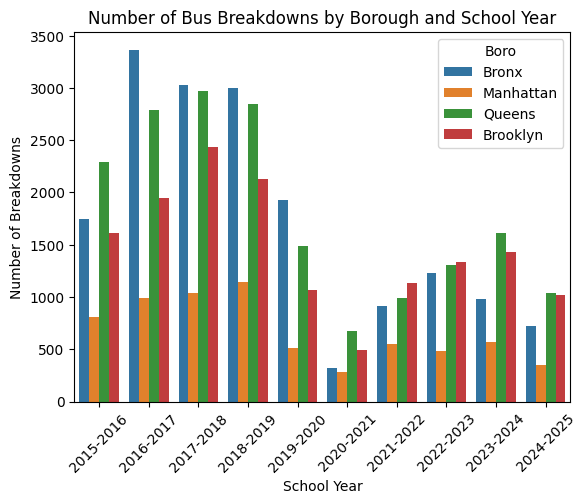

In [65]:
# bar graph of breakdowns by borough and school year
df_breakdown = df_breakdown.sort_values(by=['School_Year'], ascending=True)
ax = sns.countplot(df_breakdown, x="School_Year", hue="Boro")
ax.set_title('Number of Bus Breakdowns by Borough and School Year')
ax.set_xlabel('School Year')
ax.set_ylabel('Number of Breakdowns')
ax.tick_params(axis='x', rotation=45)

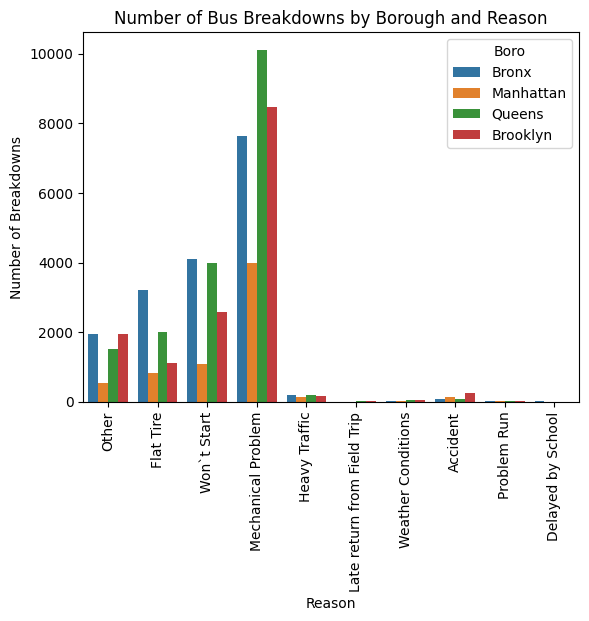

In [66]:
# graph number of breakdowns by borough and reason
ax = sns.countplot(df_breakdown, x="Reason", hue="Boro")
ax.set_title('Number of Bus Breakdowns by Borough and Reason')
ax.set_xlabel('Reason')
ax.set_ylabel('Number of Breakdowns')
ax.tick_params(axis='x', rotation=90)

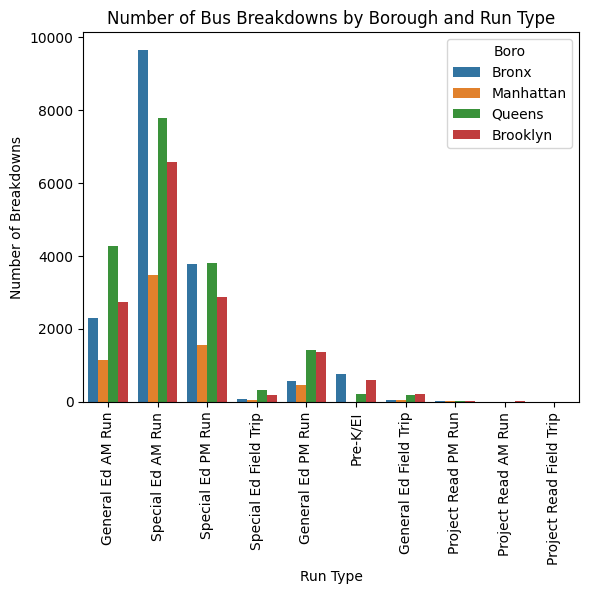

In [90]:
# graph number of breakdowns by borough and run type
ax = sns.countplot(df_breakdown, x="Run_Type", hue="Boro")
ax.set_title('Number of Bus Breakdowns by Borough and Run Type')
ax.set_xlabel('Run Type')
ax.set_ylabel('Number of Breakdowns')
ax.tick_params(axis='x', rotation=90)

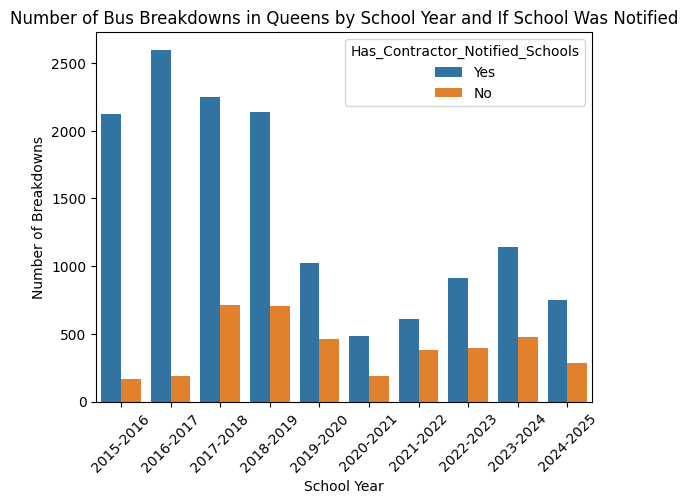

In [91]:
# graph breakdowns in Queens by school year and if school was notified
df_breakdown_q = df_breakdown[df_breakdown['Boro'] == 'Queens']
ax = sns.countplot(df_breakdown_q, x="School_Year", hue="Has_Contractor_Notified_Schools")
ax.set_title('Number of Bus Breakdowns in Queens by School Year and If School Was Notified')
ax.set_xlabel('School Year')
ax.set_ylabel('Number of Breakdowns')
ax.tick_params(axis='x', rotation=45)

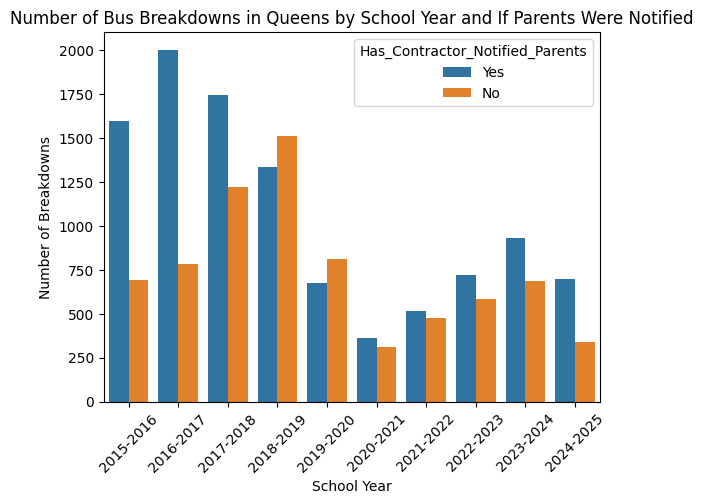

In [98]:
# graph number of breakdowns in Queens by school year and if parents were notified
ax = sns.countplot(df_breakdown_q, x="School_Year", hue="Has_Contractor_Notified_Parents")
ax.set_title('Number of Bus Breakdowns in Queens by School Year and If Parents Were Notified')
ax.set_xlabel('School Year')
ax.set_ylabel('Number of Breakdowns')
ax.tick_params(axis='x', rotation=45)

Text(0, 0.5, 'Was School Notified?')

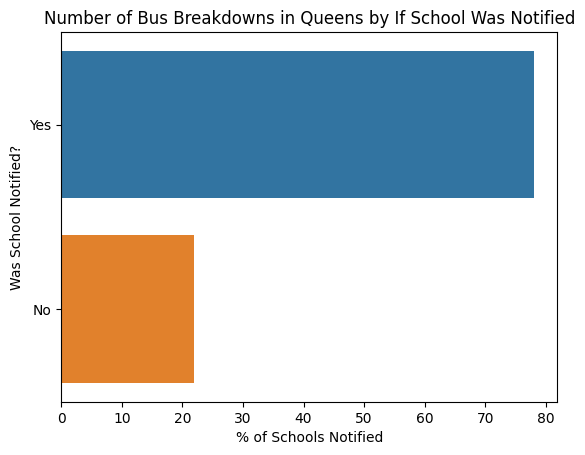

In [93]:
# graph number of breakdowns in Queens by if school was notified
ax = sns.countplot(df_breakdown_q, y="Has_Contractor_Notified_Schools", stat='percent', hue="Has_Contractor_Notified_Schools")
ax.set_title('Number of Bus Breakdowns in Queens by If School Was Notified')
ax.set_xlabel('% of Schools Notified')
ax.set_ylabel('Was School Notified?')

Text(0, 0.5, 'Was Parent Notified?')

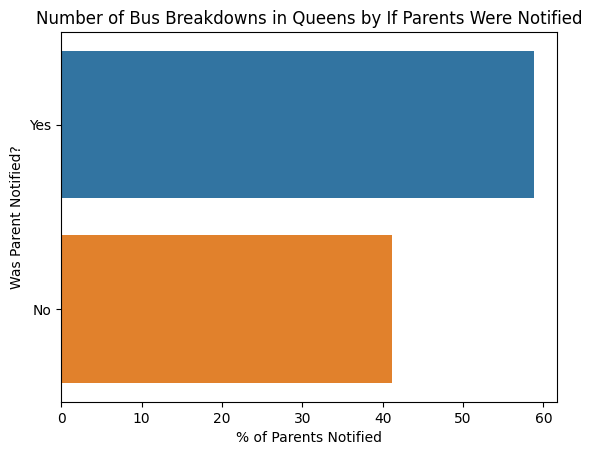

In [94]:
# graph number of breakdowns in Queens by if parents were notified
ax = sns.countplot(df_breakdown_q, y="Has_Contractor_Notified_Parents", stat='percent', hue="Has_Contractor_Notified_Parents")
ax.set_title('Number of Bus Breakdowns in Queens by If Parents Were Notified')
ax.set_xlabel('% of Parents Notified')
ax.set_ylabel('Was Parent Notified?')

Text(0, 0.5, 'Number of Breakdowns')

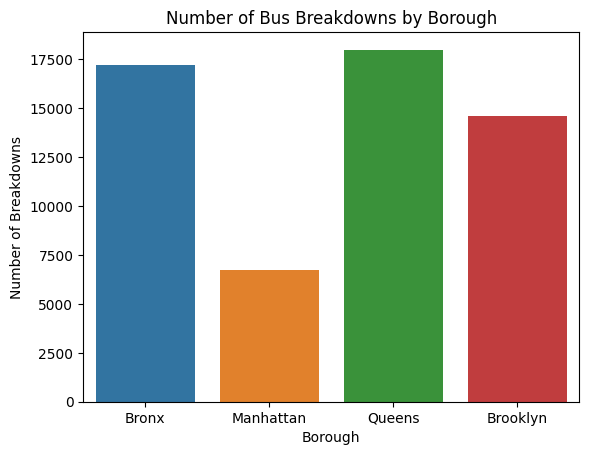

In [97]:
# graph number of breakdowns by borough
ax = sns.countplot(df_breakdown, x="Boro", hue='Boro')
ax.set_title('Number of Bus Breakdowns by Borough')
ax.set_xlabel('Borough')
ax.set_ylabel('Number of Breakdowns')

I examined school bus breakdown trends from a variety of angles in this analysis. Bus breakdowns can be disruptive to students' learning experiences as they can lead to delays in getting to and from school. Breakdowns within the last decade occurred most frequently in the years before the onset of the COVID-19 pandemic. Queens and Bronx consistently have had more breakdowns than Brooklyn and Manhattan, which could be a reflection of more students commuting to school via bus in these areas. Breakdowns are most likely to occur in the morning. Schools were notified of roughly 80% of breakdowns in Queens, while parents were notified of roughly 60% of breakdowns. It would be interesting to look at this data at more of a school district level to see if consistent bus delays or breakdowns are tied to educational outcomes and student performance.